In [3]:
%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from points import *
from LS import *
from numpy import pi as π
import ipywidgets as widgets

plt.rcParams["font.family"] = "Lucida Grande"
plt.rcParams["font.size"] = 16
plt.style.use("ggplot")

# Silly hacks for avoiding singular points and not showing rotation matrix warnings
zero = 1e-3
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


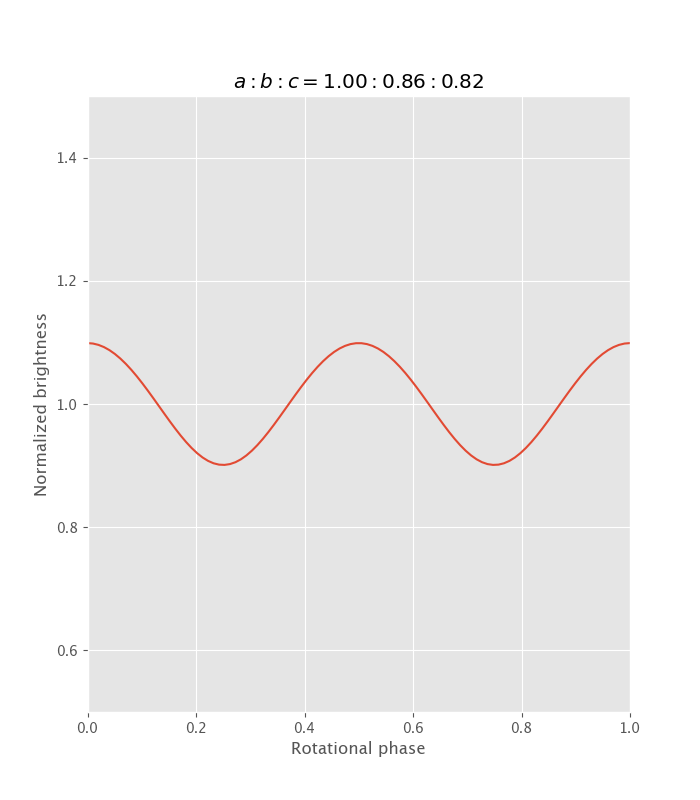

interactive(children=(IntSlider(value=0, description='α', max=180, step=5), IntSlider(value=0, description='β'…

In [8]:
a = 1; b = 0.86; c = 0.82
φ = np.linspace(0,2*π,100)

def test_L(α, β, λ):
    φ = np.linspace(0,2*π,100)
    L1 = np.zeros(φ.size)
    for i, fi in enumerate(φ):
        L1[i] = Φ_LS_a(a,b,c,α=α,β=β,λ=λ,φ=fi)
    return L1

fig, ax = plt.subplots(figsize=(7,8))
ax.set_xlim([0,1])
ax.set_xlabel('Rotational phase')
ax.set_ylabel('Normalized brightness')

def update(α = 0, β = 0., λ = 0.):
    L1 = test_L(α*π/180, β*π/180, λ*π/180)
    L1 = L1/(0.5*(np.amax(L1)+np.amin(L1)))
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(φ/(2*π))
            line.set_ydata(L1)
    else:
        ax.plot(φ/(2*π), L1/(0.5*(np.amax(L1)+np.amin(L1))))
    ax.set_ylim([0.5,1.5])
    ax.set_title(r'$a:b:c = {:.2f}:{:.2f}:{:.2f}$'.format(a,b,c))
    fig.canvas.draw()

iplot = widgets.interactive(update, α = (0,180,5), β=(0,90,5), λ=(0,360,5))
output = iplot.children[-1]
iplot

<IPython.core.display.Javascript object>


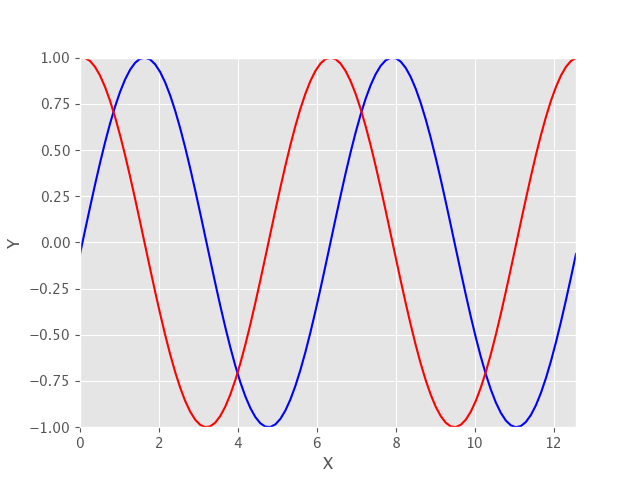

In [22]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

N = 200

def pltsin(t, ax, colors=['b']):
    x = np.linspace(0,4*np.pi,100)
    if ax.lines:
        for i, line in enumerate(ax.lines):
            line.set_xdata(x)
            y = np.sin(x + x[-1]*t/N + i*np.pi/2)
            line.set_ydata(y)
    else:
        for i, color in enumerate(colors):
            y = np.sin(x + x[-1]*t/N + i*np.pi/2)
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,4*np.pi)
ax.set_ylim(-1,1)
for f in range(2*N):
    pltsin(f, ax, ['b', 'r'])
    time.sleep(1/N)